# October 16th, 2021

**Motivation**: Registration with thorough grid search for hyperparams. <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import Allen
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
%%time
mice = Mice(Config(128, 4, 100), full_load=True, load_parcel=True, load_allen=True)

CPU times: user 4.51 s, sys: 1.21 s, total: 5.71 s
Wall time: 7.42 s


In [3]:
# mice.parcel.fit_parcel(force_fit=True, cutoff=4)

In [3]:
from register.register import *
reg = Register(mice)

In [5]:
# reg.register_anat(True)

In [4]:
"""kwargs = {
    'types': ['SyN', 'ElasticSyN', 'SyNAggro'],
    'grads': [0.2, 0.25, 0.3],
    'syn_bins': [32, 16],
    'aff_bins': [13, 20],
    'aff_rates': [0.2, 0.5, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.75,
    'n_seeds': 10,
}
kwargs"""

{
    'types': ['SyN', 'ElasticSyN', 'SyNAggro'],
    'grads': [0.2, 0.25, 0.3],
    'syn_bins': [32, 16],
    'aff_bins': [13, 20],
    'aff_rates': [0.2, 0.5, 0.8],
    'mi_q': 0.75,
    'n_seeds': 10
}

In [3]:
from register.register import *
reg = Register(mice)

In [4]:
kwargs = {
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.20, 0.25, 0.3, 0.35, 0.40, 0.5, 0.9, 1.2],
    'syn_bins': [32, 16],
    'aff_bins': [13, 20],
    'aff_rates': [0.2, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10,
}
kwargs

{
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.9, 1.2],
    'syn_bins': [32, 16],
    'aff_bins': [13, 20],
    'aff_rates': [0.2, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10
}

logger 'register_anat_(2021_10_12).log' created at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*4/log

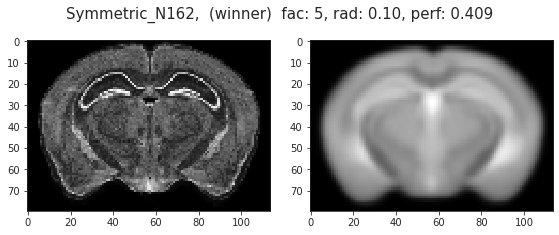

Symmetric_N162, perf:
seed                 0
type        ElasticSyN
grad               0.5
syn_bin             32
aff_bin             13
aff_rate           0.2
metric             sym
score          0.99357

registering anat sub-SLC01_ses-1:   0%|          | 0/30 [00:00<?, ?it/s]

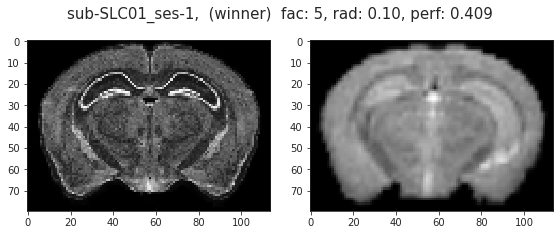

sub-SLC01_ses-1, perf:
seed                 0
type        ElasticSyN
grad              0.35
syn_bin             32
aff_bin             13
aff_rate           0.8
metric             sym
score         0.979336

registering anat sub-SLC01_ses-2:   3%|▎         | 1/30 [3:48:09<110:16:39, 13689.62s/it]

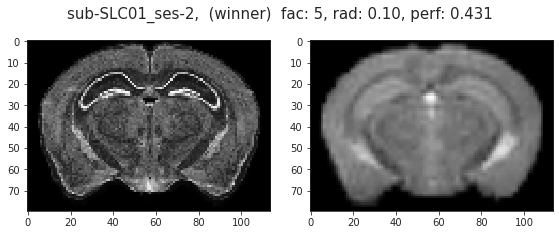

sub-SLC01_ses-2, perf:
seed               2
type             SyN
grad             0.5
syn_bin           16
aff_bin           13
aff_rate         0.2
metric           sym
score       0.977949

registering anat sub-SLC01_ses-3:   7%|▋         | 2/30 [7:24:38<103:16:14, 13277.67s/it]

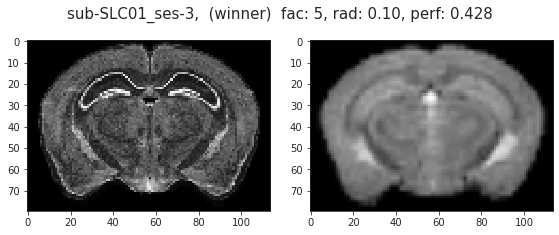

sub-SLC01_ses-3, perf:
seed               0
type             SyN
grad             0.5
syn_bin           16
aff_bin           13
aff_rate         0.2
metric           sym
score       0.983112

registering anat sub-SLC02_ses-1:  10%|█         | 3/30 [11:03:30<99:04:50, 13210.76s/it]

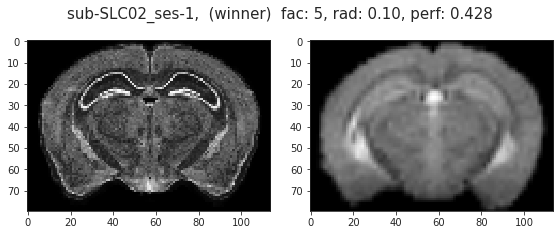

sub-SLC02_ses-1, perf:
seed                 8
type        ElasticSyN
grad               1.2
syn_bin             16
aff_bin             13
aff_rate           0.8
metric             sym
score         0.953726

registering anat sub-SLC02_ses-2:  13%|█▎        | 4/30 [14:41:29<95:02:08, 13158.78s/it]

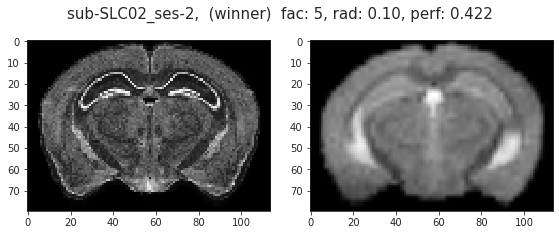

sub-SLC02_ses-2, perf:
seed               7
type             SyN
grad             0.5
syn_bin           32
aff_bin           20
aff_rate         0.8
metric           sym
score       0.935792

registering anat sub-SLC02_ses-3:  17%|█▋        | 5/30 [18:25:16<92:03:07, 13255.49s/it]

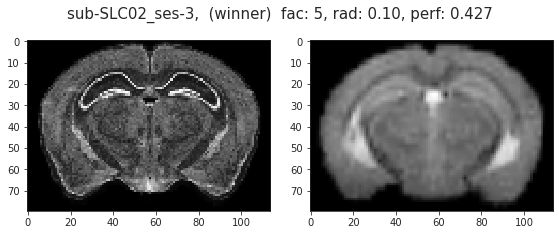

sub-SLC02_ses-3, perf:
seed               5
type             SyN
grad             0.5
syn_bin           32
aff_bin           20
aff_rate         0.2
metric           sym
score       0.946362

registering anat sub-SLC03_ses-1:  20%|██        | 6/30 [23:07:08<96:39:29, 14498.74s/it]

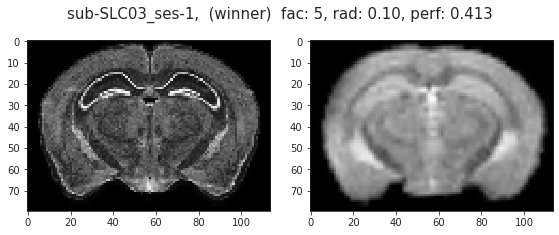

sub-SLC03_ses-1, perf:
seed                 8
type        ElasticSyN
grad              0.35
syn_bin             32
aff_bin             20
aff_rate           0.8
metric             sym
score         0.969785

registering anat sub-SLC03_ses-2:  23%|██▎       | 7/30 [28:04:02<99:33:23, 15582.77s/it]

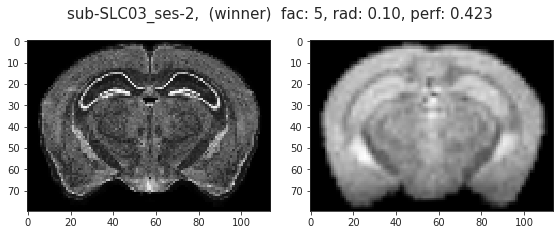

sub-SLC03_ses-2, perf:
seed                 1
type        ElasticSyN
grad               0.3
syn_bin             32
aff_bin             13
aff_rate           0.8
metric             sym
score         0.962318

registering anat sub-SLC03_ses-3:  27%|██▋       | 8/30 [33:05:07<100:03:24, 16372.92s/it]

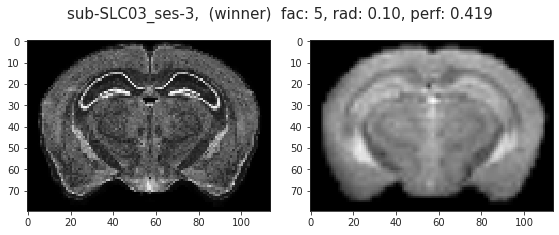

sub-SLC03_ses-3, perf:
seed                 0
type        ElasticSyN
grad               0.3
syn_bin             32
aff_bin             20
aff_rate           0.2
metric             sym
score         0.962795

registering anat sub-SLC04_ses-1:  30%|███       | 9/30 [36:58:41<91:12:23, 15635.41s/it] 

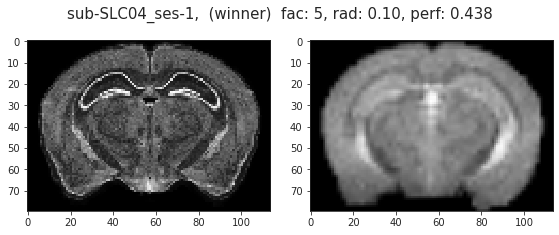

sub-SLC04_ses-1, perf:
seed                 9
type        ElasticSyN
grad               0.3
syn_bin             32
aff_bin             13
aff_rate           0.8
metric             sym
score         0.981375

registering anat sub-SLC04_ses-2:  33%|███▎      | 10/30 [40:44:53<83:19:26, 14998.35s/it]

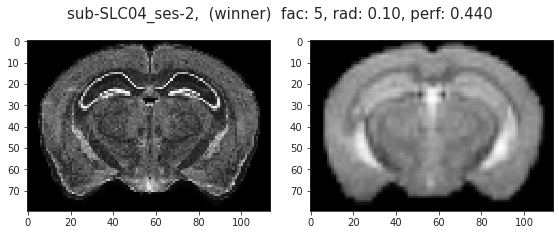

sub-SLC04_ses-2, perf:
seed                 7
type        ElasticSyN
grad               0.5
syn_bin             32
aff_bin             20
aff_rate           0.8
metric             sym
score         0.970159

registering anat sub-SLC04_ses-3:  37%|███▋      | 11/30 [44:50:09<78:42:08, 14912.01s/it]

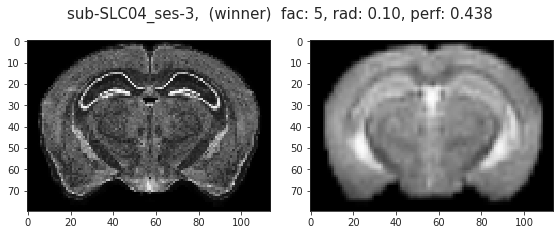

sub-SLC04_ses-3, perf:
seed                 2
type        ElasticSyN
grad              0.25
syn_bin             32
aff_bin             13
aff_rate           0.8
metric             sym
score         0.977276

registering anat sub-SLC05_ses-1:  40%|████      | 12/30 [50:29:35<82:51:21, 16571.21s/it]

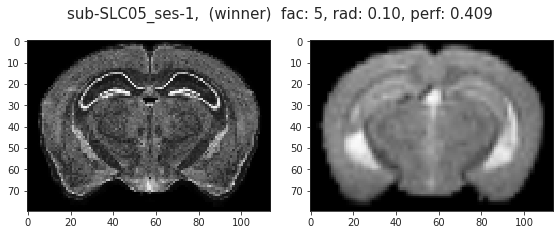

sub-SLC05_ses-1, perf:
seed                 6
type        ElasticSyN
grad               0.5
syn_bin             16
aff_bin             13
aff_rate           0.2
metric             sym
score         0.975758

registering anat sub-SLC05_ses-2:  43%|████▎     | 13/30 [56:20:17<84:38:56, 17925.67s/it]

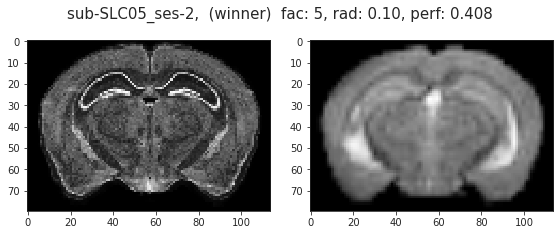

sub-SLC05_ses-2, perf:
seed                 8
type        ElasticSyN
grad              0.35
syn_bin             32
aff_bin             13
aff_rate           0.2
metric             sym
score         0.958838

registering anat sub-SLC05_ses-3:  47%|████▋     | 14/30 [62:10:40<83:49:37, 18861.08s/it]

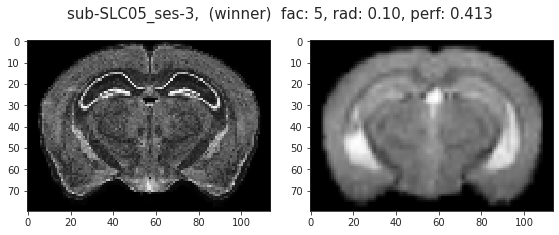

sub-SLC05_ses-3, perf:
seed                 0
type        ElasticSyN
grad               0.3
syn_bin             32
aff_bin             13
aff_rate           0.8
metric             sym
score         0.975777

registering anat sub-SLC06_ses-1:  50%|█████     | 15/30 [66:54:46<76:18:30, 18314.01s/it]

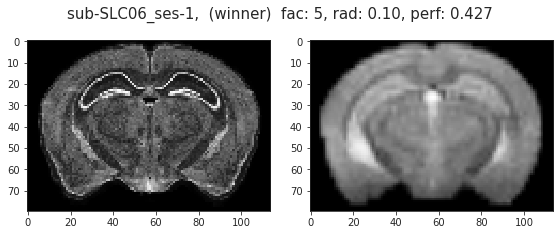

sub-SLC06_ses-1, perf:
seed               7
type             SyN
grad            0.25
syn_bin           32
aff_bin           20
aff_rate         0.2
metric           sym
score       0.965058

registering anat sub-SLC06_ses-2:  53%|█████▎    | 16/30 [70:30:18<64:55:15, 16693.97s/it]

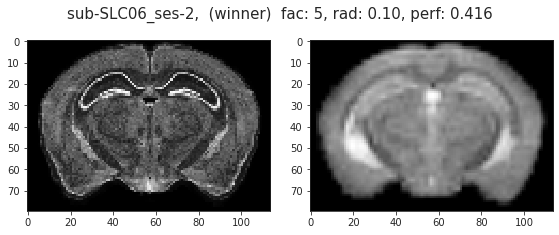

sub-SLC06_ses-2, perf:
seed               6
type             SyN
grad             0.4
syn_bin           16
aff_bin           13
aff_rate         0.2
metric           sym
score       0.963937

registering anat sub-SLC06_ses-3:  57%|█████▋    | 17/30 [74:14:31<56:45:51, 15719.35s/it]

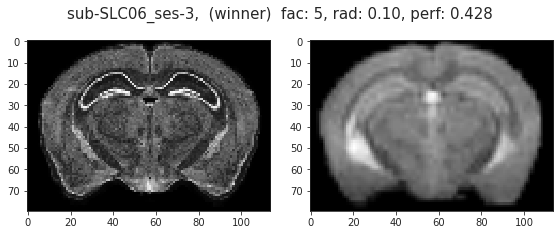

sub-SLC06_ses-3, perf:
seed                 6
type        ElasticSyN
grad              0.25
syn_bin             32
aff_bin             13
aff_rate           0.8
metric             sym
score         0.972604

registering anat sub-SLC07_ses-1:  60%|██████    | 18/30 [77:55:42<49:56:45, 14983.80s/it]

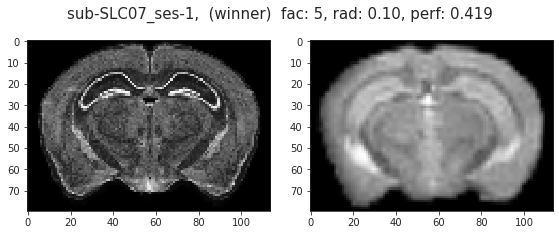

sub-SLC07_ses-1, perf:
seed                 8
type        ElasticSyN
grad               0.3
syn_bin             32
aff_bin             20
aff_rate           0.2
metric             sym
score         0.953374

registering anat sub-SLC07_ses-2:  63%|██████▎   | 19/30 [81:39:30<44:21:22, 14516.59s/it]

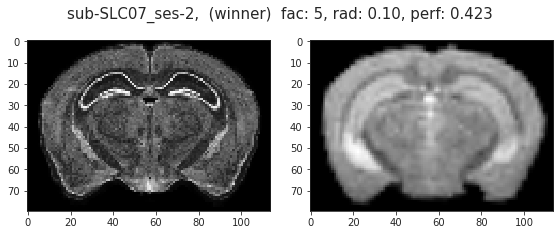

sub-SLC07_ses-2, perf:
seed                 5
type        ElasticSyN
grad               0.9
syn_bin             16
aff_bin             20
aff_rate           0.2
metric             sym
score         0.952118

registering anat sub-SLC07_ses-3:  67%|██████▋   | 20/30 [85:27:03<39:36:11, 14257.15s/it]

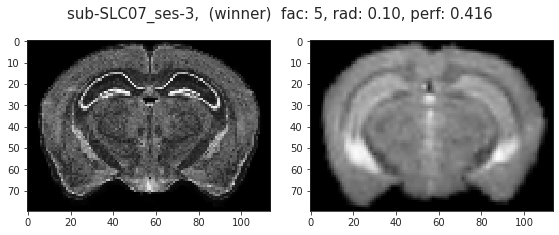

sub-SLC07_ses-3, perf:
seed                 2
type        ElasticSyN
grad               0.5
syn_bin             32
aff_bin             13
aff_rate           0.2
metric             sym
score         0.962861

registering anat sub-SLC08_ses-1:  70%|███████   | 21/30 [89:08:37<34:55:13, 13968.20s/it]

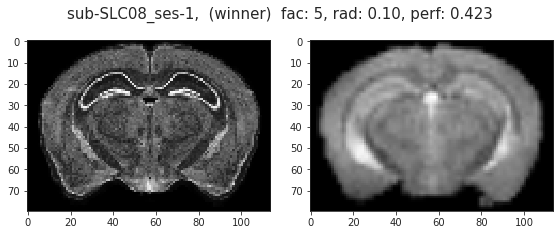

sub-SLC08_ses-1, perf:
seed               1
type             SyN
grad             0.4
syn_bin           32
aff_bin           20
aff_rate         0.8
metric           sym
score       0.952088

registering anat sub-SLC08_ses-2:  73%|███████▎  | 22/30 [92:45:01<30:23:01, 13672.71s/it]

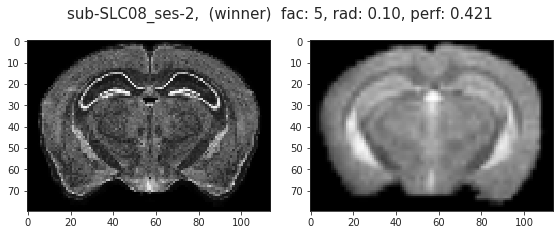

sub-SLC08_ses-2, perf:
seed                 3
type        ElasticSyN
grad               0.3
syn_bin             32
aff_bin             13
aff_rate           0.2
metric             sym
score         0.930726

registering anat sub-SLC08_ses-3:  77%|███████▋  | 23/30 [99:30:43<32:48:40, 16874.42s/it]

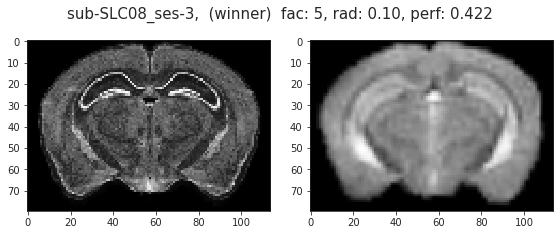

sub-SLC08_ses-3, perf:
seed                 6
type        ElasticSyN
grad               0.3
syn_bin             32
aff_bin             13
aff_rate           0.2
metric             sym
score         0.958294

registering anat sub-SLC09_ses-1:  80%|████████  | 24/30 [107:22:37<33:50:41, 20306.93s/it]

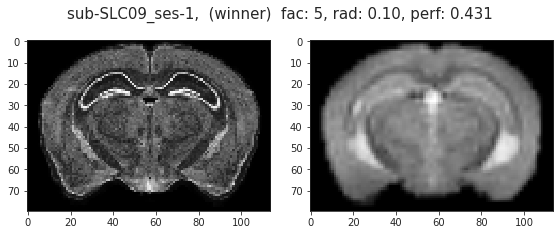

sub-SLC09_ses-1, perf:
seed               8
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.983589

registering anat sub-SLC09_ses-2:  83%|████████▎ | 25/30 [114:47:44<30:52:15, 22227.10s/it]

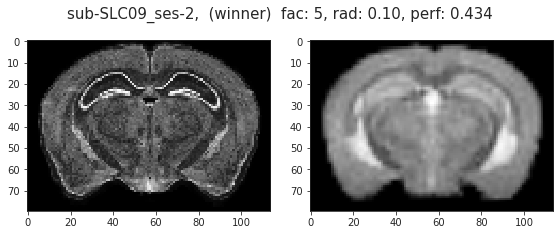

sub-SLC09_ses-2, perf:
seed                 5
type        ElasticSyN
grad               0.4
syn_bin             32
aff_bin             13
aff_rate           0.2
metric             sym
score         0.983021

registering anat sub-SLC09_ses-3:  87%|████████▋ | 26/30 [119:45:21<23:14:24, 20916.07s/it]

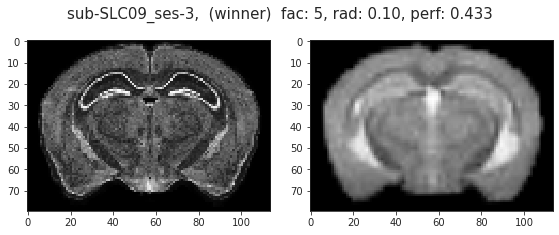

sub-SLC09_ses-3, perf:
seed               2
type             SyN
grad            0.25
syn_bin           32
aff_bin           20
aff_rate         0.8
metric           sym
score       0.982062

registering anat sub-SLC10_ses-1:  90%|█████████ | 27/30 [123:23:20<15:28:14, 18564.84s/it]

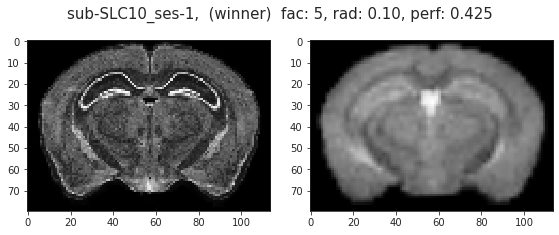

sub-SLC10_ses-1, perf:
seed                 0
type        ElasticSyN
grad              0.25
syn_bin             32
aff_bin             20
aff_rate           0.2
metric             sym
score         0.971213

registering anat sub-SLC10_ses-2:  93%|█████████▎| 28/30 [126:56:59<9:21:21, 16840.87s/it] 

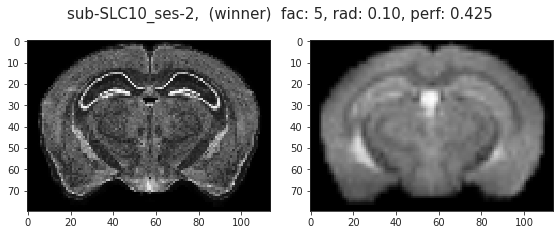

sub-SLC10_ses-2, perf:
seed                 4
type        ElasticSyN
grad              0.25
syn_bin             32
aff_bin             20
aff_rate           0.8
metric             sym
score         0.976879

registering anat sub-SLC10_ses-3:  97%|█████████▋| 29/30 [130:30:02<4:20:23, 15623.49s/it]

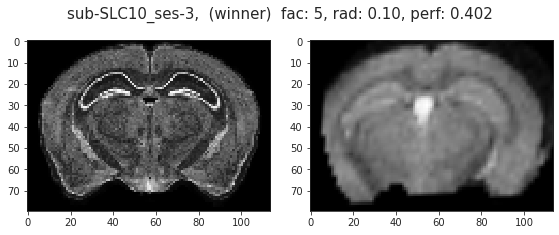

sub-SLC10_ses-3, perf:
seed               3
type             SyN
grad             0.4
syn_bin           32
aff_bin           20
aff_rate         0.2
metric           sym
score       0.927667

registering anat sub-SLC10_ses-3: 100%|██████████| 30/30 [133:59:01<00:00, 16078.06s/it]  


overal scores:  0.965 ± 0.015

CPU times: user 58d 12h 39min 20s, sys: 1d 9h 15min 41s, total: 59d 21h 55min 2s
Wall time: 5d 18h 21min 7s


In [5]:
%%time
reg.register_anat(save_results=True, **kwargs)

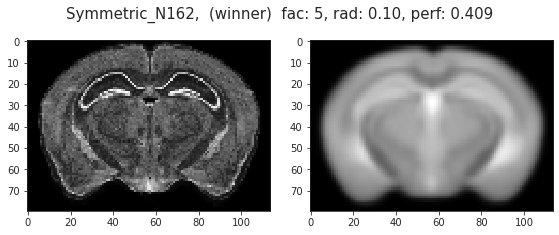

  0%|          | 0/5 [00:00<?, ?it/s]

Symmetric_N162, perf:
seed               4
type        SyNAggro
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score        0.98674

registering anat:  sub-SLC01_ses-1:   0%|          | 0/30 [00:00<?, ?it/s]

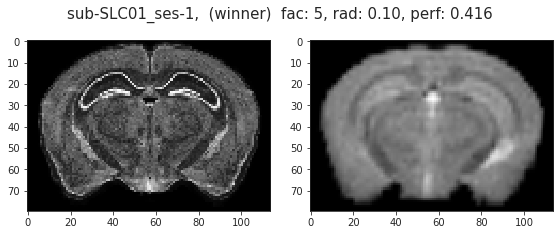

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC01_ses-1, perf:
seed               0
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.970813

registering anat:  sub-SLC01_ses-2:   3%|▎         | 1/30 [16:49<8:07:42, 1009.04s/it]

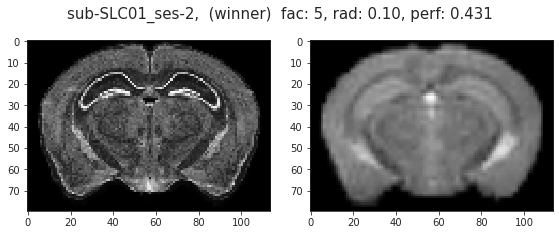

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC01_ses-2, perf:
seed               2
type        SyNAggro
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.970233

registering anat:  sub-SLC01_ses-3:   7%|▋         | 2/30 [33:39<7:51:15, 1009.85s/it]

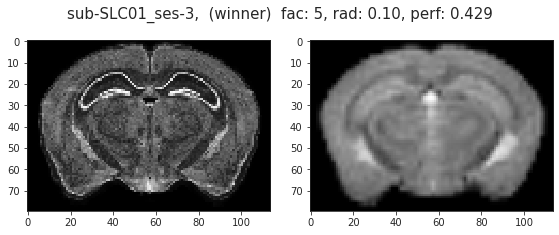

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC01_ses-3, perf:
seed               2
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.972699

registering anat:  sub-SLC02_ses-1:  10%|█         | 3/30 [51:09<7:42:41, 1028.22s/it]

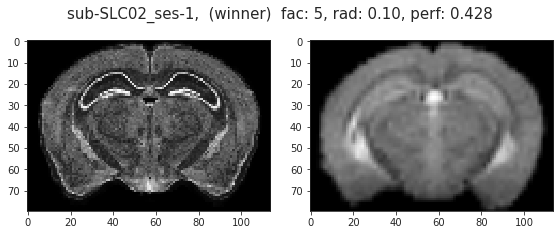

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC02_ses-1, perf:
seed               0
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.949689

registering anat:  sub-SLC02_ses-2:  13%|█▎        | 4/30 [1:07:52<7:21:12, 1018.17s/it]

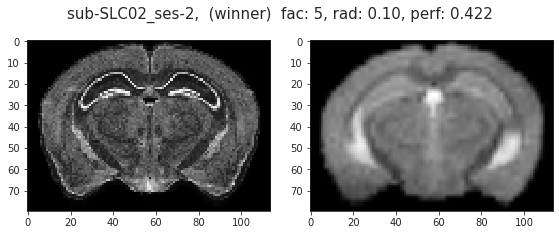

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC02_ses-2, perf:
seed               4
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.929381

registering anat:  sub-SLC02_ses-3:  17%|█▋        | 5/30 [1:24:47<7:03:47, 1017.11s/it]

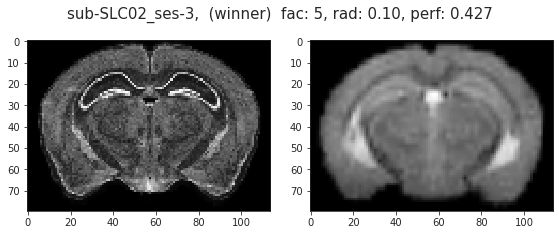

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC02_ses-3, perf:
seed              1
type            SyN
grad            0.3
syn_bin          32
aff_bin          13
aff_rate        0.2
metric          sym
score       0.94203

registering anat:  sub-SLC03_ses-1:  20%|██        | 6/30 [1:41:27<6:44:32, 1011.36s/it]

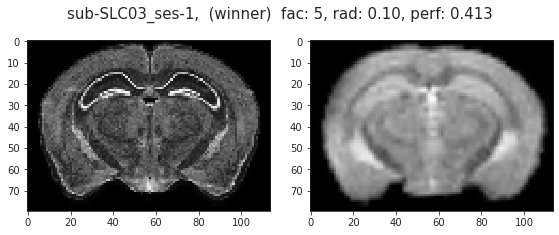

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC03_ses-1, perf:
seed               3
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.964877

registering anat:  sub-SLC03_ses-2:  23%|██▎       | 7/30 [1:59:08<6:33:54, 1027.57s/it]

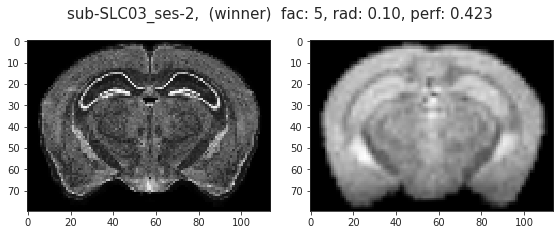

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC03_ses-2, perf:
seed               1
type             SyN
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.962119

registering anat:  sub-SLC03_ses-3:  27%|██▋       | 8/30 [2:17:18<6:24:05, 1047.51s/it]

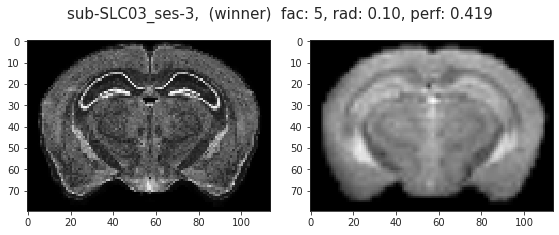

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC03_ses-3, perf:
seed               4
type             SyN
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.961366

registering anat:  sub-SLC04_ses-1:  30%|███       | 9/30 [2:34:17<6:03:26, 1038.42s/it]

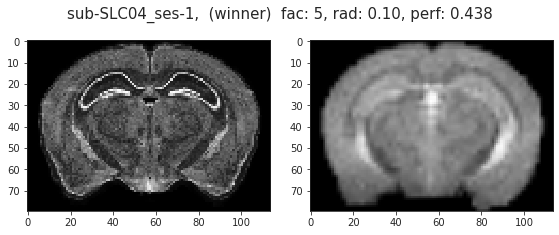

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC04_ses-1, perf:
seed               1
type        SyNAggro
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.958211

registering anat:  sub-SLC04_ses-2:  33%|███▎      | 10/30 [2:51:59<5:48:37, 1045.89s/it]

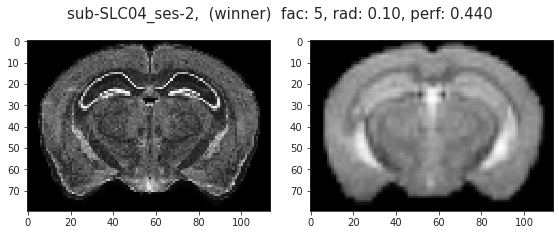

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC04_ses-2, perf:
seed               0
type             SyN
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.977386

registering anat:  sub-SLC04_ses-3:  37%|███▋      | 11/30 [3:09:14<5:30:07, 1042.50s/it]

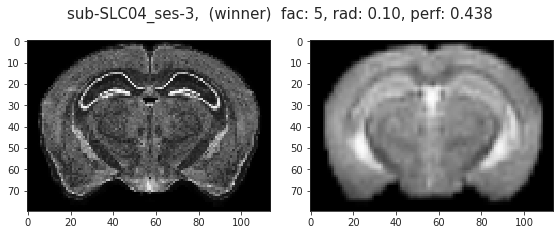

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC04_ses-3, perf:
seed               4
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score        0.96891

registering anat:  sub-SLC05_ses-1:  40%|████      | 12/30 [3:26:41<5:13:10, 1043.90s/it]

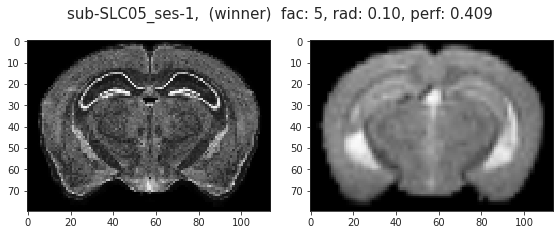

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC05_ses-1, perf:
seed               0
type        SyNAggro
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.974684

registering anat:  sub-SLC05_ses-2:  43%|████▎     | 13/30 [3:43:51<4:54:34, 1039.70s/it]

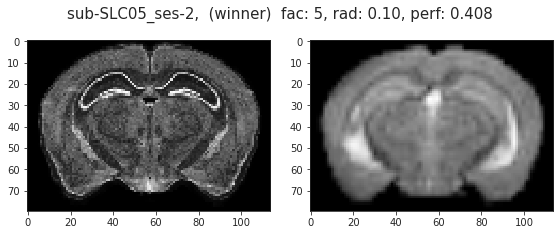

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC05_ses-2, perf:
seed               3
type             SyN
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.965364

registering anat:  sub-SLC05_ses-3:  47%|████▋     | 14/30 [4:01:27<4:38:34, 1044.66s/it]

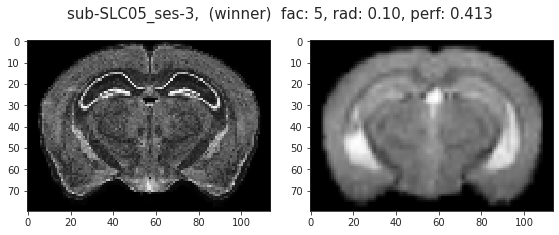

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC05_ses-3, perf:
seed               3
type        SyNAggro
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.976476

registering anat:  sub-SLC06_ses-1:  50%|█████     | 15/30 [4:18:43<4:20:27, 1041.81s/it]

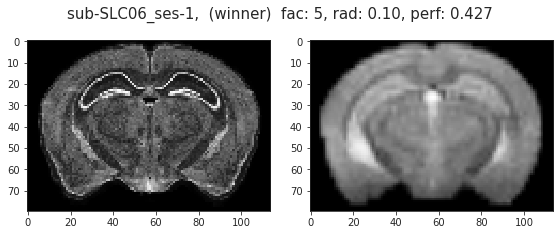

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC06_ses-1, perf:
seed               0
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.945778

registering anat:  sub-SLC06_ses-2:  53%|█████▎    | 16/30 [4:35:56<4:02:30, 1039.31s/it]

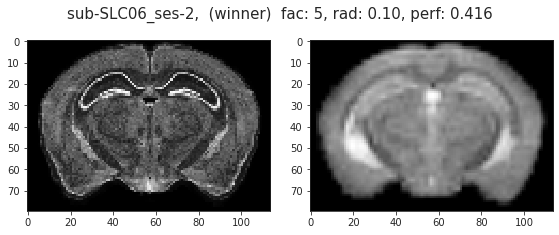

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC06_ses-2, perf:
seed               4
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.943825

registering anat:  sub-SLC06_ses-3:  57%|█████▋    | 17/30 [4:53:09<3:44:47, 1037.49s/it]

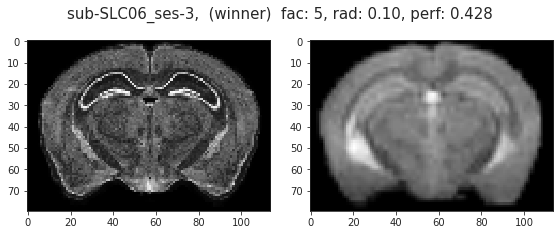

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC06_ses-3, perf:
seed               0
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.958641

registering anat:  sub-SLC07_ses-1:  60%|██████    | 18/30 [5:10:52<3:28:58, 1044.91s/it]

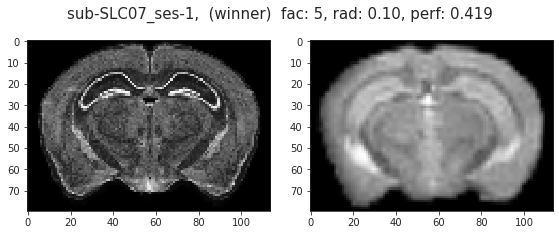

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC07_ses-1, perf:
seed               3
type             SyN
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.954113

registering anat:  sub-SLC07_ses-2:  63%|██████▎   | 19/30 [5:27:40<3:09:34, 1034.05s/it]

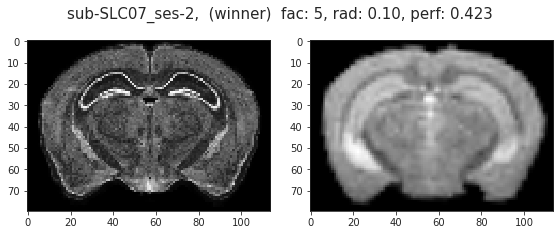

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC07_ses-2, perf:
seed               4
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.947632

registering anat:  sub-SLC07_ses-3:  67%|██████▋   | 20/30 [5:44:58<2:52:30, 1035.00s/it]

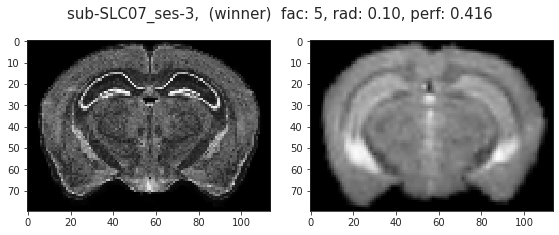

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC07_ses-3, perf:
seed              2
type            SyN
grad            0.3
syn_bin          32
aff_bin          13
aff_rate        0.8
metric          sym
score       0.93895

registering anat:  sub-SLC08_ses-1:  70%|███████   | 21/30 [6:02:22<2:35:41, 1037.93s/it]

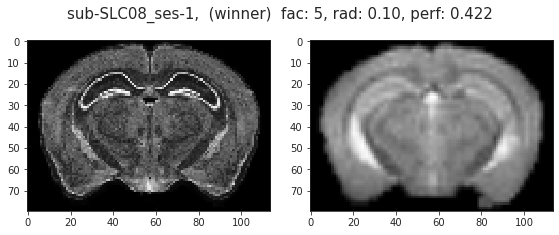

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC08_ses-1, perf:
seed               0
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.953461

registering anat:  sub-SLC08_ses-2:  73%|███████▎  | 22/30 [6:19:12<2:17:14, 1029.37s/it]

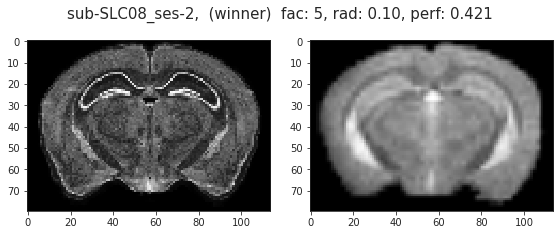

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC08_ses-2, perf:
seed               1
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.951958

registering anat:  sub-SLC08_ses-3:  77%|███████▋  | 23/30 [6:36:31<2:00:25, 1032.24s/it]

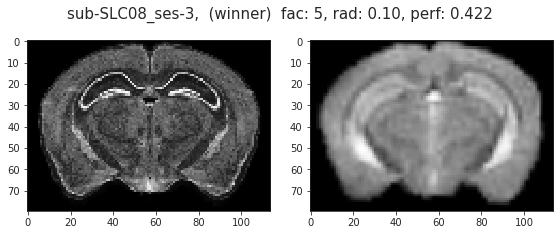

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC08_ses-3, perf:
seed               3
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.968533

registering anat:  sub-SLC09_ses-1:  80%|████████  | 24/30 [6:53:45<1:43:17, 1033.00s/it]

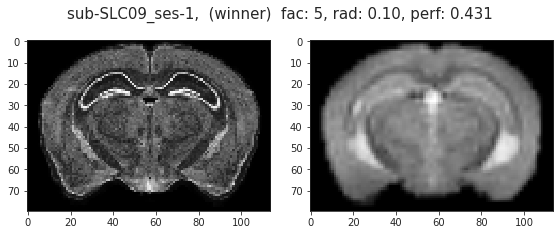

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC09_ses-1, perf:
seed               4
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.983777

registering anat:  sub-SLC09_ses-2:  83%|████████▎ | 25/30 [7:10:43<1:25:41, 1028.28s/it]

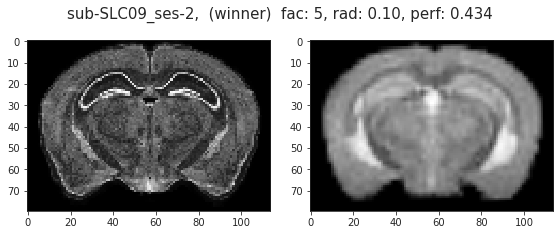

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC09_ses-2, perf:
seed               1
type        SyNAggro
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.986299

registering anat:  sub-SLC09_ses-3:  87%|████████▋ | 26/30 [7:27:55<1:08:37, 1029.49s/it]

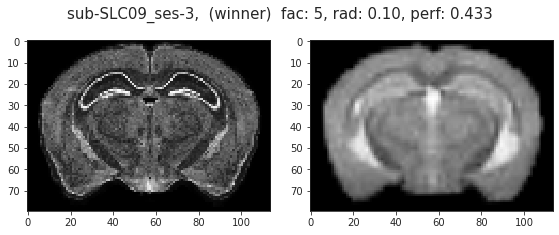

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC09_ses-3, perf:
seed              2
type            SyN
grad            0.3
syn_bin          32
aff_bin          13
aff_rate        0.2
metric          sym
score       0.98384

registering anat:  sub-SLC10_ses-1:  90%|█████████ | 27/30 [7:45:23<51:44, 1034.95s/it]  

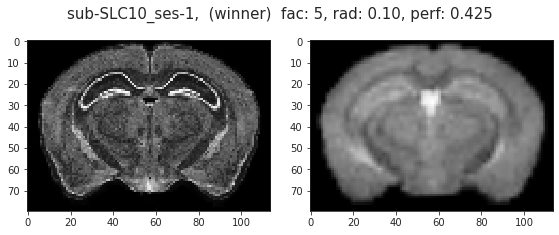

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC10_ses-1, perf:
seed               2
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.976689

registering anat:  sub-SLC10_ses-2:  93%|█████████▎| 28/30 [8:02:37<34:29, 1034.66s/it]

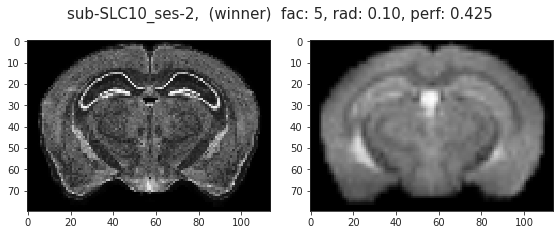

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC10_ses-2, perf:
seed               3
type        SyNAggro
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.964131

registering anat:  sub-SLC10_ses-3:  97%|█████████▋| 29/30 [8:20:04<17:18, 1038.39s/it]

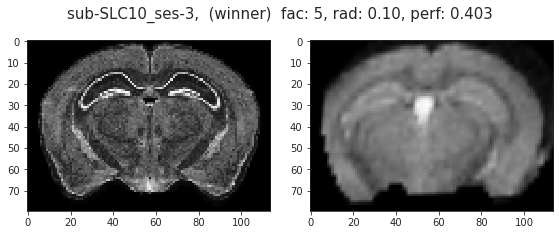

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC10_ses-3, perf:
seed               3
type        SyNAggro
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.959427

registering anat:  sub-SLC10_ses-3: 100%|██████████| 30/30 [8:38:03<00:00, 1036.11s/it]


overal scores:  0.962 ± 0.014

CPU times: user 5d 19h 19min 4s, sys: 2h 38min 39s, total: 5d 21h 57min 43s
Wall time: 8h 58min 8s


In [6]:
962 + 14, 962 - 14

(976, 948)

In [29]:
import pathlib

df = []
for path in sorted(pathlib.Path(mice.cfg.tx_dir).rglob('*.df')):
    _df = pd.read_pickle(str(path))
    _df['key'] = path.parent.name
    df.append(_df)
df = pd.concat(df)
df

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,key
0,0,SyN,0.2,32,13,0.2,mi,0.473468,Symmetric_N162
1,0,SyN,0.2,32,13,0.2,ovp_MOp,1.000000,Symmetric_N162
2,0,SyN,0.2,32,13,0.2,sym_MOp,0.985489,Symmetric_N162
3,0,SyN,0.2,32,13,0.2,ovp_MOs,1.000000,Symmetric_N162
4,0,SyN,0.2,32,13,0.2,sym_MOs,0.996136,Symmetric_N162
...,...,...,...,...,...,...,...,...,...
2155,4,SyNAggro,0.3,32,20,0.8,sym_STRd,0.929283,sub-SLC10_ses-3
2156,4,SyNAggro,0.3,32,20,0.8,ovp_iso,0.993765,sub-SLC10_ses-3
2157,4,SyNAggro,0.3,32,20,0.8,sym_iso,0.883690,sub-SLC10_ses-3
2158,4,SyNAggro,0.3,32,20,0.8,sym,0.896131,sub-SLC10_ses-3


In [32]:
mi = df.loc[df['metric'] == 'mi']
sym = df.loc[df['metric'] == 'sym']

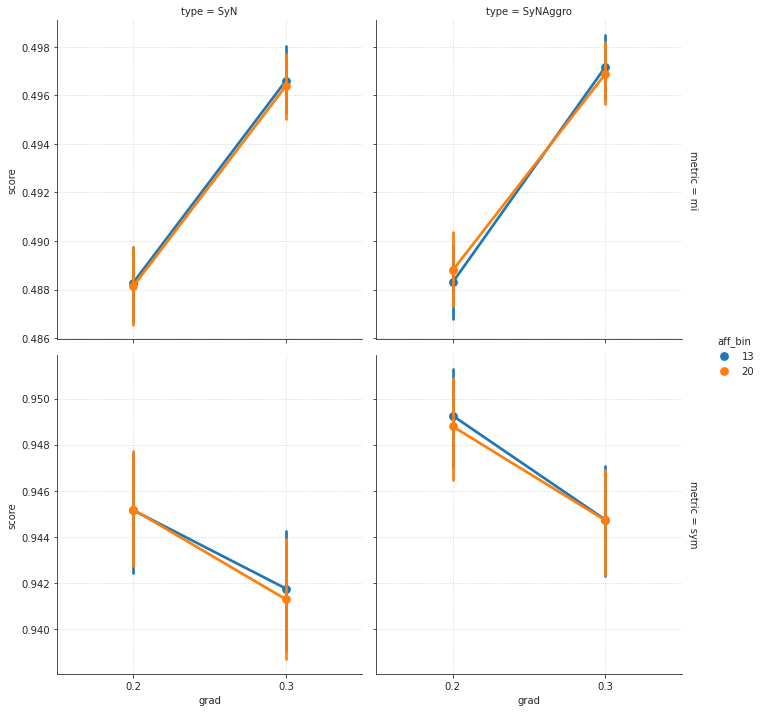

In [50]:
fg = sns.catplot(
    data=df.loc[df['metric'].isin(['sym', 'mi'])],
    x='grad',
    y='score',
    col='type',
    row='metric',
    kind='point',
    hue='aff_bin',
    sharey='row',
    margin_titles=True,
)
for ax in fg.axes.ravel():
    ax.grid()

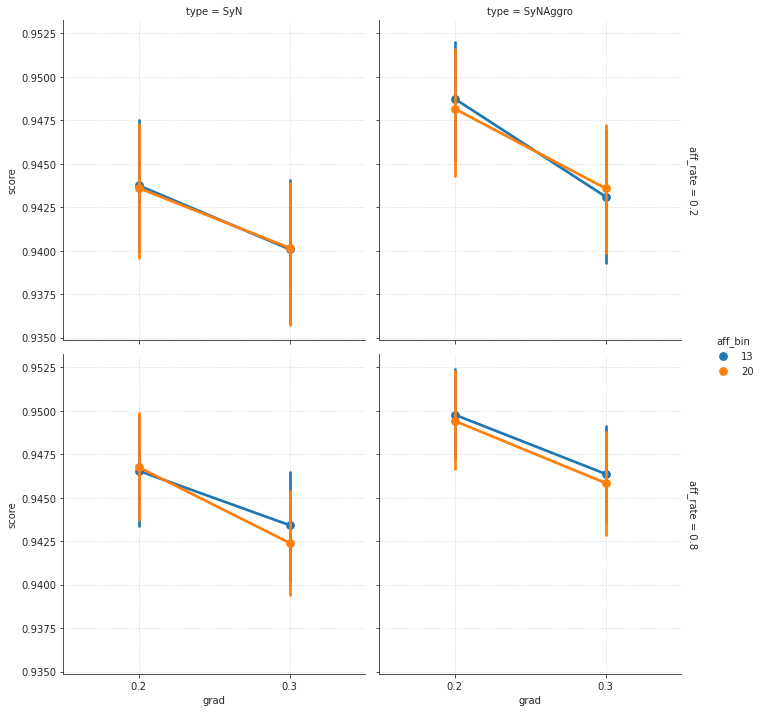

In [52]:
fg = sns.catplot(
    data=df.loc[df['metric'].isin(['sym'])],
    x='grad',
    y='score',
    col='type',
    row='aff_rate',
    kind='point',
    hue='aff_bin',
    sharey='all',
    margin_titles=True,
)
for ax in fg.axes.ravel():
    ax.grid()

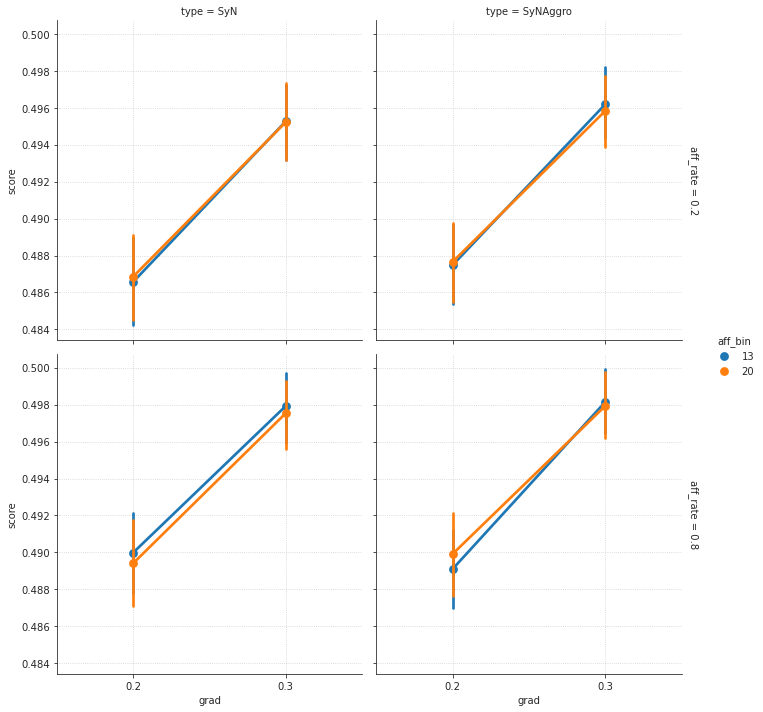

In [53]:
fg = sns.catplot(
    data=df.loc[df['metric'].isin(['mi'])],
    x='grad',
    y='score',
    col='type',
    row='aff_rate',
    kind='point',
    hue='aff_bin',
    sharey='all',
    margin_titles=True,
)
for ax in fg.axes.ravel():
    ax.grid()

## Masks

In [55]:


sorted(os.listdir(mice.cfg.masks_dir))

[
    'Symmetric_N162_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'Symmetric_N162_space-CCF-3d_cortex-inv.nii.gz',
    'Symmetric_N162_space-CCF-3d_iso-inv.nii.gz',
    'Symmetric_N162_space-CCF-3d_subcortex-inv.nii.gz',
    'png',
    'sub-SLC01_ses-1_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC01_ses-1_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC01_ses-1_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC01_ses-1_space-CCF-3d_subcortex-inv.nii.gz',
    'sub-SLC01_ses-2_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC01_ses-2_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC01_ses-2_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC01_ses-2_space-CCF-3d_subcortex-inv.nii.gz',
    'sub-SLC01_ses-3_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC01_ses-3_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC01_ses-3_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC01_ses-3_space-CCF-3d_subcortex-inv.nii.gz',
    'sub-SLC02_ses-1_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC02_ses-1_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC02_ses-1_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC02_ses-1_space-CCF-3d_subcortex-inv.nii.gz',
    'sub-SLC02_ses-2_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC02_ses-2_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC02_ses-2_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC02_ses-2_space-CCF-3d_subcortex-inv.nii.gz',
    'sub-SLC02_ses-3_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC02_ses-3_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC02_ses-3_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC02_ses-3_space-CCF-3d_subcortex-inv.nii.gz',
    'sub-SLC03_ses-1_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC03_ses-1_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC03_ses-1_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC03_ses-1_space-CCF-3d_subcortex-inv.nii.gz',
    'sub-SLC03_ses-2_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC03_ses-2_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC03_ses-2_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC03_ses-2_space-CCF-3d_subcortex-inv.nii.gz',
    'sub-SLC03_ses-3_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC03_ses-3_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC03_ses-3_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC03_ses-3_space-CCF-3d_subcortex-inv.nii.gz',
    'sub-SLC04_ses-1_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC04_ses-1_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC04_ses-1_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC04_ses-1_space-CCF-3d_subcortex-inv.nii.gz',
    'sub-SLC04_ses-2_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC04_ses-2_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC04_ses-2_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC04_ses-2_space-CCF-3d_subcortex-inv.nii.gz',
    'sub-SLC04_ses-3_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC04_ses-3_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC04_ses-3_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC04_ses-3_space-CCF-3d_subcortex-inv.nii.gz',
    'sub-SLC05_ses-1_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC05_ses-1_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC05_ses-1_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC05_ses-1_space-CCF-3d_subcortex-inv.nii.gz',
    'sub-SLC05_ses-2_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC05_ses-2_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC05_ses-2_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC05_ses-2_space-CCF-3d_subcortex-inv.nii.gz',
    'sub-SLC05_ses-3_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC05_ses-3_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC05_ses-3_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC05_ses-3_space-CCF-3d_subcortex-inv.nii.gz',
    'sub-SLC06_ses-1_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC06_ses-1_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC06_ses-1_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC06_ses-1_space-CCF-3d_subcortex-inv.nii.gz',
    'sub-SLC06_ses-2_space-CCF-3d_cortex-eroded-inv.nii.gz',
    'sub-SLC06_ses-2_space-CCF-3d_cortex-inv.nii.gz',
    'sub-SLC06_ses-2_space-CCF-3d_iso-inv.nii.gz',
    'sub-SLC06_ses-2_space-CCF-3d_

In [85]:
y = mice.parcel.results['subcortex']
num_subcortex = len(np.unique(y[y > 0]))

y = mice.parcel.results['cortex']
num_cortex = len(np.unique(y[y > 0]))

num_cortex, num_subcortex * 2, num_subcortex 

(512, 310, 155)

In [86]:
y = mice.parcel.results['cortex-eroded']
len(np.unique(y[y > 0]))

512

In [130]:
perc = collections.defaultdict(list)
for path in sorted(pathlib.Path(mice.cfg.masks_dir).rglob('*cortex*.nii.gz')):
    img = ants.image_read(str(path))
    x = img.numpy().astype('uint32')
    num = len(np.unique(x[x > 0]))
    key = '_'.join(path.name.split('_')[:2])
    obj_name = path.name.split('_')[-1].split('.')[0]
    
    if obj_name == 'subcortex-inv':
        percentage = int(100 * num / num_subcortex)
    else:
        percentage = int(100 * num / num_cortex)
    
    perc[obj_name].append(percentage)
    
    # print(f"{key}:\t{obj_name}: {num},  ratio: {percentage} %")  

In [131]:
df = pd.DataFrame(perc)
df = df.melt()

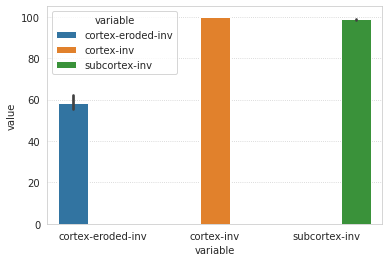

In [133]:
sns.barplot(data=df, y='value', x='variable', hue='variable')
plt.show()

In [135]:
a = np.arange(15).reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [138]:
a.flat

<numpy.flatiter object at 0x5614236b5d50>

In [139]:
convert_time(10)

00 - 00:00:10  (dd - hh:mm:ss)